# Time Series Data Exploration & Visualization Assignment

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [3]:
sales = pd.read_csv("data/sales.csv", sep=";")

### Convert the SalesDate field to a datetime data type.

In [4]:
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
 9   cal_day            object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 515.6+ MB


### Create a line chart showing the number of total units sold per day in February.

In [ ]:
def linechart(df, x, length=8, width=15, title=""):
    if df.index.name != x:
        df = df.set_index(x)

    ax = df.plot(figsize=(width,length), cmap="Set2")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=4)
    
    plt.title(title + "\n", fontsize=20)


In [5]:
sales['SalesDate']

0         2018-02-05 07:38:25.430
1         2018-02-02 16:03:31.150
2         2018-05-03 19:31:56.880
3         2018-04-07 14:43:55.420
4         2018-02-12 15:37:03.940
                    ...          
6758120   2018-04-20 22:39:03.150
6758121   2018-01-13 15:08:18.700
6758122   2018-01-18 12:05:16.950
6758123   2018-02-26 08:13:37.850
6758124   2018-04-17 15:26:30.270
Name: SalesDate, Length: 6758125, dtype: datetime64[ns]

In [11]:
sales['cal_day'] = sales['SalesDate'].dt.date

In [12]:
feb_sales =sales[(sales['SalesDate']>='2018-02-01')&(sales['SalesDate']<='2018-02-28')]

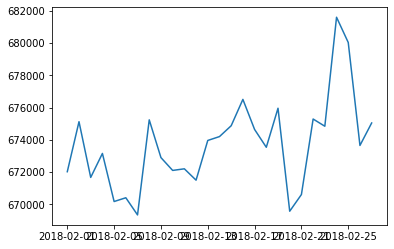

In [15]:
plt.plot(feb_sales.groupby('cal_day').sum()['Quantity'])

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [17]:
prod_ids = [124, 344, 407, 449]
march_sales =sales[(sales['SalesDate']>='2018-03-01')&(sales['SalesDate']<='2018-03-31')]


In [19]:
march_filtered = march_sales[march_sales['ProductID'].isin(prod_ids)]

In [21]:
plot_df = march_filtered.pivot_table(index='cal_day', columns='ProductID', values='Quantity', aggfunc='sum')

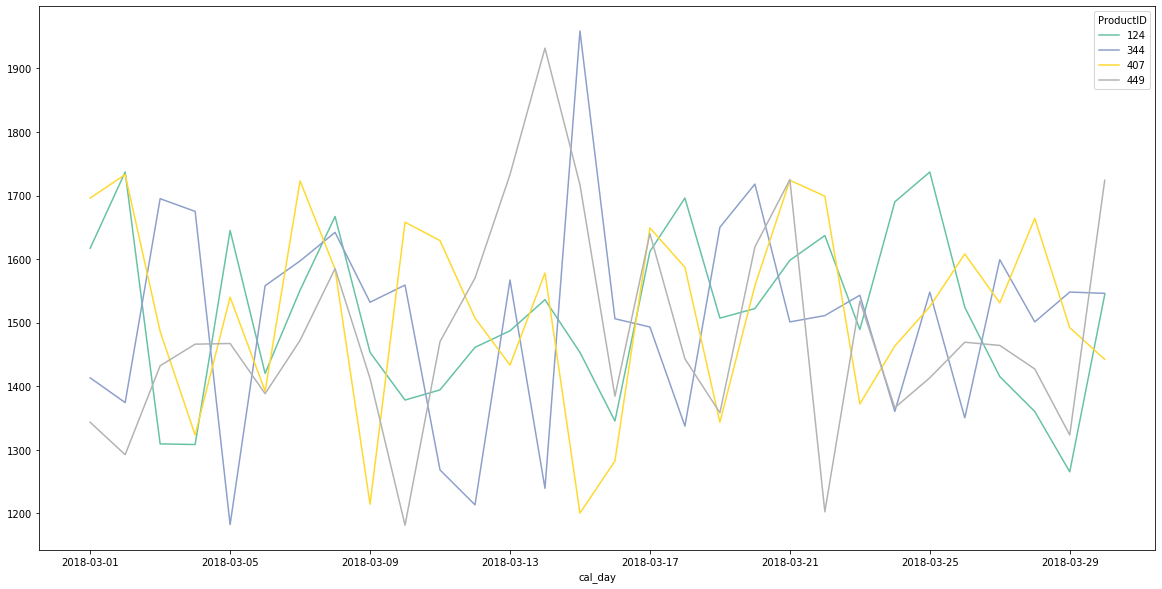

In [31]:

plot_df.plot(figsize=(20,10), cmap='Set2')

plt.show()

### Create a bar chart that shows units sold by each hour of the day.

In [ ]:
def barchart(df, x, y, groups=None, length=8, width=14, title=""):
    plt.figure(figsize=(width,length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + "\n", fontsize=16)


In [32]:
sales['hour']=sales['SalesDate'].dt.hour


In [35]:
sales['hour']

0           7.0
1          16.0
2          19.0
3          14.0
4          15.0
           ... 
6758120    22.0
6758121    15.0
6758122    12.0
6758123     8.0
6758124    15.0
Name: hour, Length: 6758125, dtype: float64

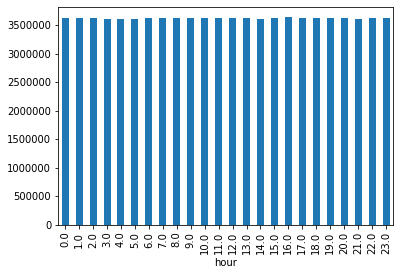

In [34]:
sales.groupby('hour').sum()['Quantity'].plot(kind='bar')

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [ ]:
def heatmap(df, length=8, width=18, title=""):
    plt.figure(figsize=(width,length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', 
                     cmap='Reds', linewidths=.01)
    
    plt.title(title + "\n", fontsize=16)


In [37]:
sales['weekday']=sales['SalesDate'].dt.weekday

In [40]:
agg_df = sales.groupby(["hour", "weekday"]).sum()["Quantity"].reset_index()

In [41]:
hour_weekday = agg_df.pivot_table(
    index="hour", columns="weekday", values="Quantity", aggfunc="sum"
)

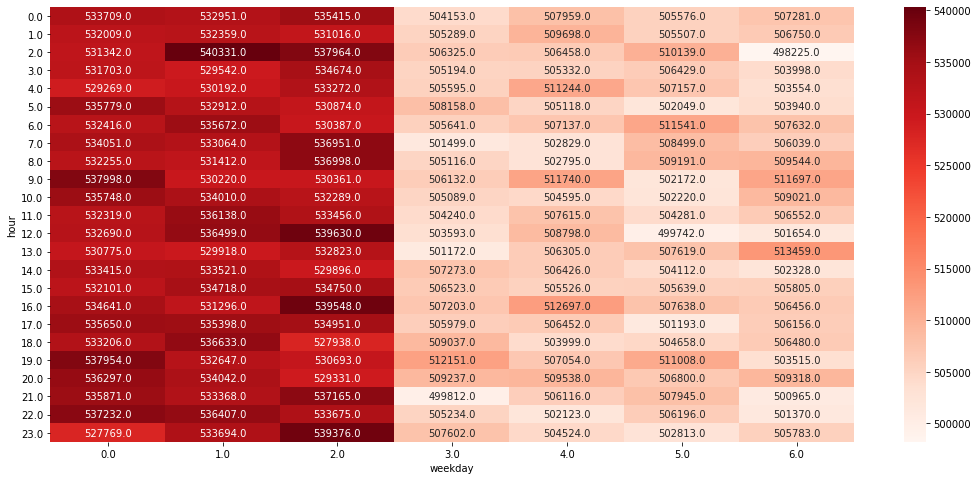

In [42]:
plt.figure(figsize=(18, 8))
sns.heatmap(hour_weekday, annot=True, cmap="Reds", fmt=".1f")

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [48]:
import random

In [54]:
prod_20 = random.choices(sales['ProductID'].unique(), k=20)

In [55]:
sales_20 = sales[sales['ProductID'].isin(prod_20)]

In [58]:
sales_20.head(2)

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,cal_day,hour,weekday
20,21,16,91382,147,24,NaN,"0,00",2018-04-30 08:42:49.010,7BKSQOA5XQ50L9DLAXUB,2018-04-30,8.0,0.0
21,22,18,23677,442,6,NaN,"0,00",2018-01-31 22:14:45.630,3XJQHRN1HU7295SB6QUL,2018-01-31,22.0,2.0


In [59]:
pivot_20 = sales_20.pivot_table(index='cal_day', columns='ProductID', values='Quantity', aggfunc='sum')

In [62]:
def correlation_plot(df, title=""):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title + "\n", fontsize=20)


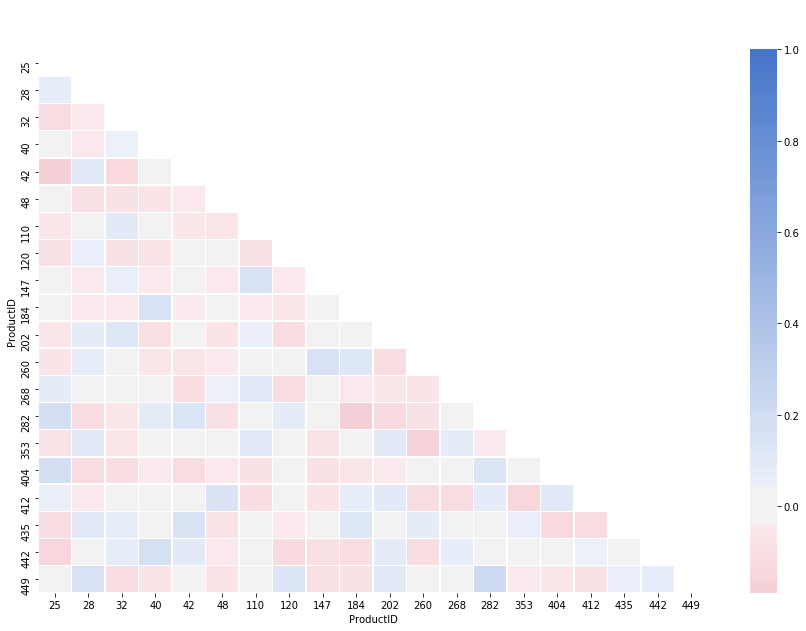

In [63]:
correlation_plot(pivot_20)

### Create a histogram showing the distribution of daily units sold.

In [64]:
def histogram(df, field=None, length=8, width=15, title=""):
    plt.figure(figsize=(width,length))
    sns.distplot(df[field])
    plt.title(title + "\n", fontsize=16)


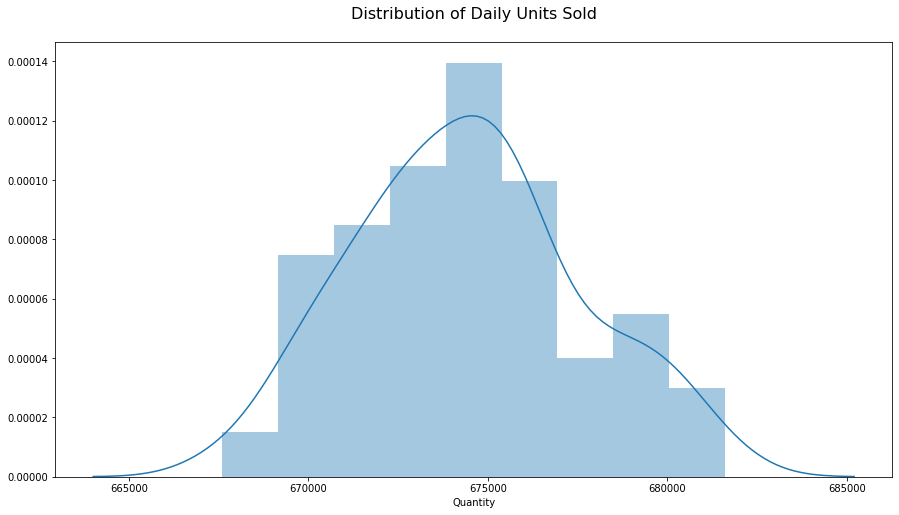

In [67]:
daily_units = sales.groupby('cal_day').agg({'Quantity': 'sum'}).reset_index()
histogram(daily_units, 'Quantity', title='Distribution of Daily Units Sold')


### Create a violin plot showing the distribution of daily units sold by month.

In [70]:
sales['month'] = sales['SalesDate'].dt.month_name()
date_month_units = sales.groupby(['cal_day','month']).agg({'Quantity':'sum'}).reset_index()

In [71]:
sns.violinplot(date_month_units)

TypeError: '<' not supported between instances of 'str' and 'datetime.date'